# Importing Libraries

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [234]:
df = pd.read_csv('caas_data.csv')  

In [235]:
df.head()

,Provider,product,Price,CPU_RAM_price,Storage_price,Cluster_fee_price,licensed_OS_price,Hybrid_support_price,internal_egress_price,external_egress_price,...,Autoscaling,Vendor_agnostic,Payment,Term_Length,Instance_Type,Disk_type,OS,Multicloud_support,Pay_per_container,Region
0,Digital,Ocean,0.06870,0.055000,0.0000,0.0,0.000000,0.0,0.00000,0.0137,...,horizontal,no,A_no upfront,1,A_on_demand,SSD,free,no,no,US
1,Digital,Ocean,0.07322,0.059520,0.0000,0.0,0.000000,0.0,0.00000,0.0137,...,horizontal,no,A_no upfront,0,A_on_demand,SSD,free,no,no,US
2,Amazon,ECS12,0.08244,0.072800,0.0069,0.0,0.000000,0.0,0.00274,0.0000,...,vertical&horizontal,yes,A_no upfront,0,A_on_demand,SSD,Windows,no,no,Asia
3,Google,S7,0.11518,0.051788,0.0065,0.0,0.007577,0.0,0.00000,0.0493,...,vertical&horizontal,no,A_no upfront,0,spot,HDD,free,no,no,A_Europe
4,Google,S9,0.11518,0.051788,0.0065,0.0,0.007577,0.0,0.00000,0.0493,...,vertical&horizontal,no,A_no upfront,0,spot,HDD,A_Linux,no,no,A_Europe


In [236]:
df.shape

(640, 27)

In [237]:
df.columns

Index(['Provider', 'product', 'Price', 'CPU_RAM_price', 'Storage_price',
       'Cluster_fee_price', 'licensed_OS_price', 'Hybrid_support_price',
       'internal_egress_price', 'external_egress_price', 'Internal_traffic',
       'External_traffic', 'CPU', 'RAM', 'STORAGE', 'Cluster_mgmt_fee',
       'Regional_redundancy', 'Autoscaling', 'Vendor_agnostic', 'Payment',
       'Term_Length', 'Instance_Type', 'Disk_type', 'OS', 'Multicloud_support',
       'Pay_per_container', 'Region'],
      dtype='object')

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Provider               640 non-null    object 
 1   product                640 non-null    object 
 2   Price                  640 non-null    float64
 3   CPU_RAM_price          640 non-null    float64
 4   Storage_price          640 non-null    float64
 5   Cluster_fee_price      640 non-null    float64
 6   licensed_OS_price      640 non-null    float64
 7   Hybrid_support_price   640 non-null    float64
 8   internal_egress_price  640 non-null    float64
 9   external_egress_price  640 non-null    float64
 10  Internal_traffic       640 non-null    int64  
 11  External_traffic       640 non-null    int64  
 12  CPU                    640 non-null    int64  
 13  RAM                    640 non-null    int64  
 14  STORAGE                640 non-null    int64  
 15  Cluste

In [239]:
df.describe()

,Price,CPU_RAM_price,Storage_price,Cluster_fee_price,licensed_OS_price,Hybrid_support_price,internal_egress_price,external_egress_price,Internal_traffic,External_traffic,CPU,RAM,STORAGE,Term_Length
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,2.398906,0.680118,0.064292,0.078969,0.049210,0.085432,0.028036,1.394653,2654.921875,11494.062500,11.796875,46.175000,435.781250,1.060938
std,2.444533,0.734921,0.127612,0.062418,0.203891,0.230245,0.064148,1.651585,3513.406249,14030.731832,10.710122,41.254438,408.038572,1.229924
min,0.068700,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,300.000000,2.000000,4.000000,100.000000,0.000000
25%,0.516150,0.136700,0.009700,0.030000,0.000000,0.000000,0.000000,0.164400,400.000000,1000.000000,4.000000,16.000000,100.000000,0.000000
50%,1.596550,0.412560,0.015900,0.100000,0.000000,0.000000,0.001370,0.674000,1000.000000,10000.000000,8.000000,32.000000,300.000000,1.000000
75%,3.285215,0.946095,0.056600,0.100000,0.000000,0.043840,0.013699,2.191800,5000.000000,20000.000000,16.000000,64.000000,500.000000,3.000000
max,10.884250,3.584000,0.663000,0.200000,1.472000,1.368000,0.273973,7.534247,10000.000000,50000.000000,32.000000,160.000000,2000.000000,3.000000


In [240]:
df.describe(include='object')

,Provider,product,Cluster_mgmt_fee,Regional_redundancy,Autoscaling,Vendor_agnostic,Payment,Instance_Type,Disk_type,OS,Multicloud_support,Pay_per_container,Region
count,640,640,640,640,640,640,640,640,640,640,640,640,640
unique,6,548,2,2,2,2,3,3,2,3,2,2,4
top,Amazon,Ocean,yes,yes,vertical&horizontal,no,A_no upfront,A_on_demand,SSD,A_Linux,no,no,A_Europe
freq,220,16,495,469,534,600,522,472,334,310,374,573,279


# Checking for Null values

In [241]:
df.isnull().sum()

Provider                 0
product                  0
Price                    0
CPU_RAM_price            0
Storage_price            0
Cluster_fee_price        0
licensed_OS_price        0
Hybrid_support_price     0
internal_egress_price    0
external_egress_price    0
Internal_traffic         0
External_traffic         0
CPU                      0
RAM                      0
STORAGE                  0
Cluster_mgmt_fee         0
Regional_redundancy      0
Autoscaling              0
Vendor_agnostic          0
Payment                  0
Term_Length              0
Instance_Type            0
Disk_type                0
OS                       0
Multicloud_support       0
Pay_per_container        0
Region                   0
dtype: int64

# Checking for outliers

<Figure size 2000x1500 with 0 Axes>

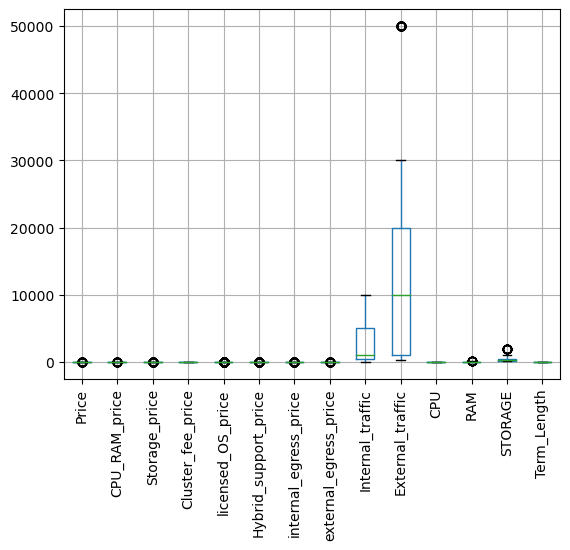

<Figure size 2000x1500 with 0 Axes>

In [242]:
df.boxplot()
plt.xticks(rotation=90)
plt.figure(figsize=(20,15))

<Figure size 800x600 with 0 Axes>

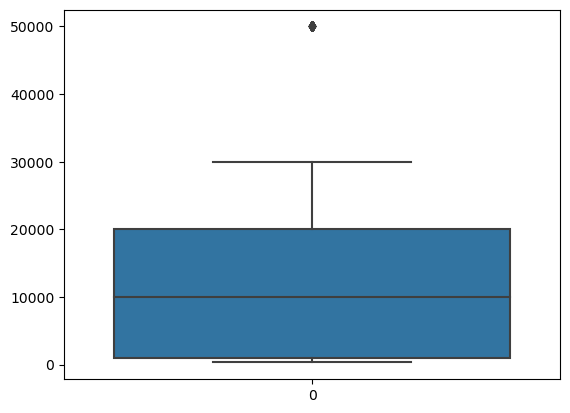

<Figure size 800x600 with 0 Axes>

In [243]:
sns.boxplot(df['External_traffic'])
plt.figure(figsize=(8,6))

# Data Visualization

In [244]:
df.describe(include='object')

,Provider,product,Cluster_mgmt_fee,Regional_redundancy,Autoscaling,Vendor_agnostic,Payment,Instance_Type,Disk_type,OS,Multicloud_support,Pay_per_container,Region
count,640,640,640,640,640,640,640,640,640,640,640,640,640
unique,6,548,2,2,2,2,3,3,2,3,2,2,4
top,Amazon,Ocean,yes,yes,vertical&horizontal,no,A_no upfront,A_on_demand,SSD,A_Linux,no,no,A_Europe
freq,220,16,495,469,534,600,522,472,334,310,374,573,279


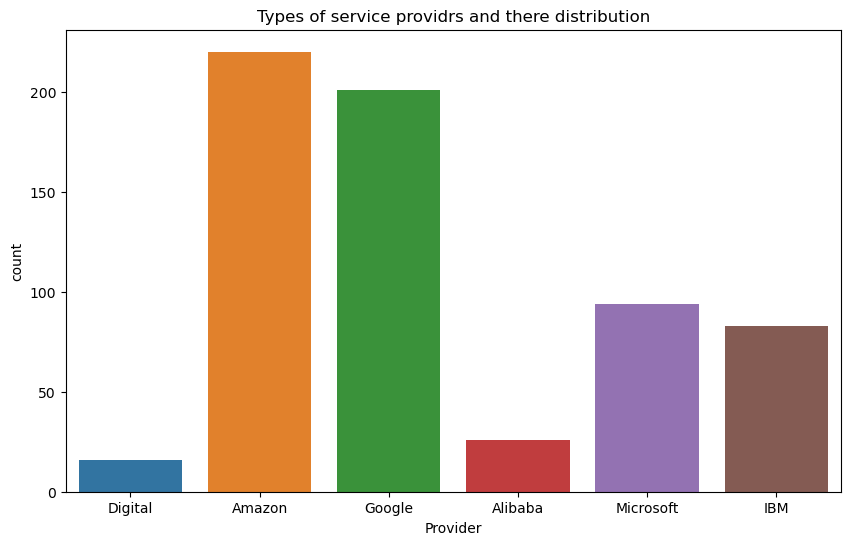

In [245]:
plt.figure(figsize=(10,6))
sns.countplot(x='Provider',data=df)
plt.title("Types of service providrs and there distribution")
plt.show()

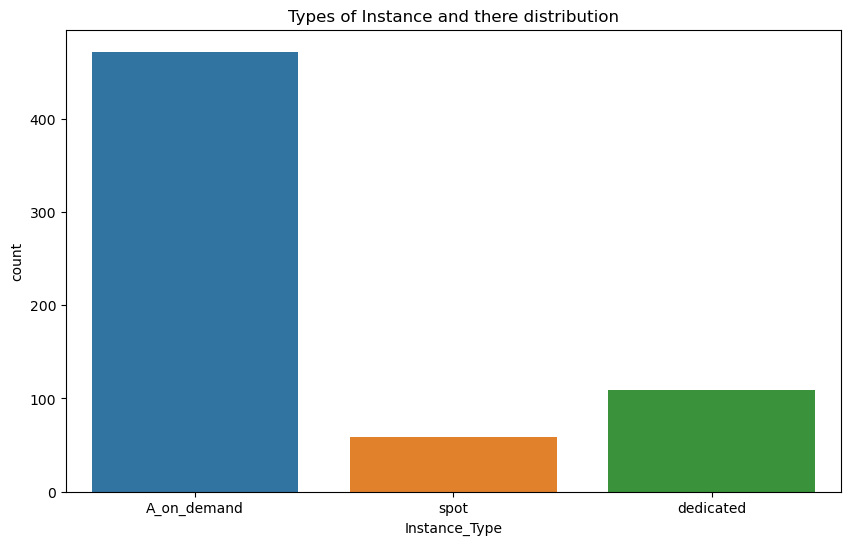

In [246]:
plt.figure(figsize=(10,6))
sns.countplot(x="Instance_Type",data=df)
plt.title("Types of Instance and there distribution")
plt.show()

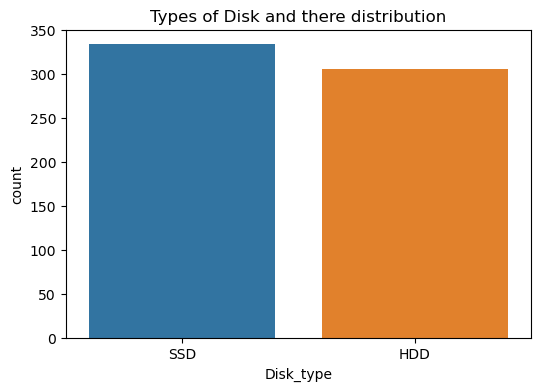

In [247]:
plt.figure(figsize=(6,4))
sns.countplot(x="Disk_type",data=df)
plt.title("Types of Disk and there distribution")
plt.show()

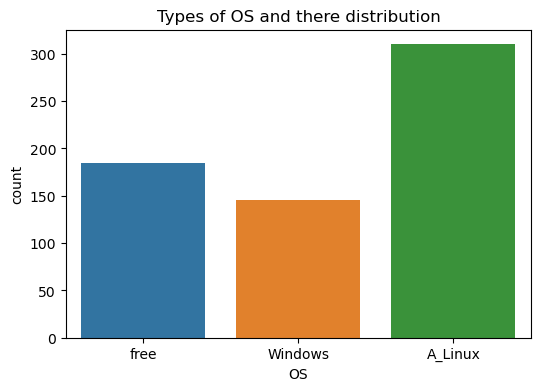

In [248]:
plt.figure(figsize=(6,4))
sns.countplot(x="OS",data=df)
plt.title("Types of OS and there distribution")
plt.show()

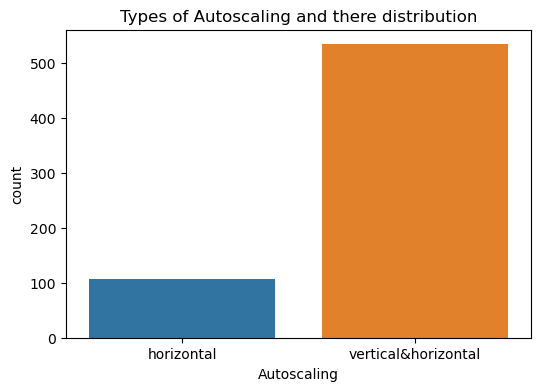

In [249]:
plt.figure(figsize=(6,4))
sns.countplot(x="Autoscaling",data=df)
plt.title("Types of Autoscaling and there distribution")
plt.show()

# Feature Engneering

In [250]:
# encoding Autoscaling column
df.replace({'Autoscaling':{'horizontal':0,'vertical&horizontal':1}},inplace=True)

#encoding Instance_Type column
df.replace({'Instance_Type':{'dedicated':0,"A_on_demand":1,"":2,'spot':3}},inplace=True)

#encoding Provider column
df.replace({'Provider':{'Alibaba':0,"Amazon":1,"Digital":2,'Google':3,'Microsoft':4,'IBM':5}},inplace=True)

#encoding Regional_redundancy column
df.replace({'Regional_redundancy':{'yes':0,"no":1}},inplace=True)

#encoding Disk_type column
df.replace({'Disk_type':{'HDD':0,"SSD":1}},inplace=True)

#encoding OS column
df.replace({'OS':{"free":0,"Windows":1,"A_Linux":2}},inplace=True)

array([[<Axes: title={'center': 'Provider'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'CPU_RAM_price'}>,
        <Axes: title={'center': 'Storage_price'}>],
       [<Axes: title={'center': 'Cluster_fee_price'}>,
        <Axes: title={'center': 'licensed_OS_price'}>,
        <Axes: title={'center': 'Hybrid_support_price'}>,
        <Axes: title={'center': 'internal_egress_price'}>],
       [<Axes: title={'center': 'external_egress_price'}>,
        <Axes: title={'center': 'Internal_traffic'}>,
        <Axes: title={'center': 'External_traffic'}>,
        <Axes: title={'center': 'CPU'}>],
       [<Axes: title={'center': 'RAM'}>,
        <Axes: title={'center': 'STORAGE'}>,
        <Axes: title={'center': 'Regional_redundancy'}>,
        <Axes: title={'center': 'Autoscaling'}>],
       [<Axes: title={'center': 'Term_Length'}>,
        <Axes: title={'center': 'Instance_Type'}>,
        <Axes: title={'center': 'Disk_type'}>,
        <Axes: title={'center':

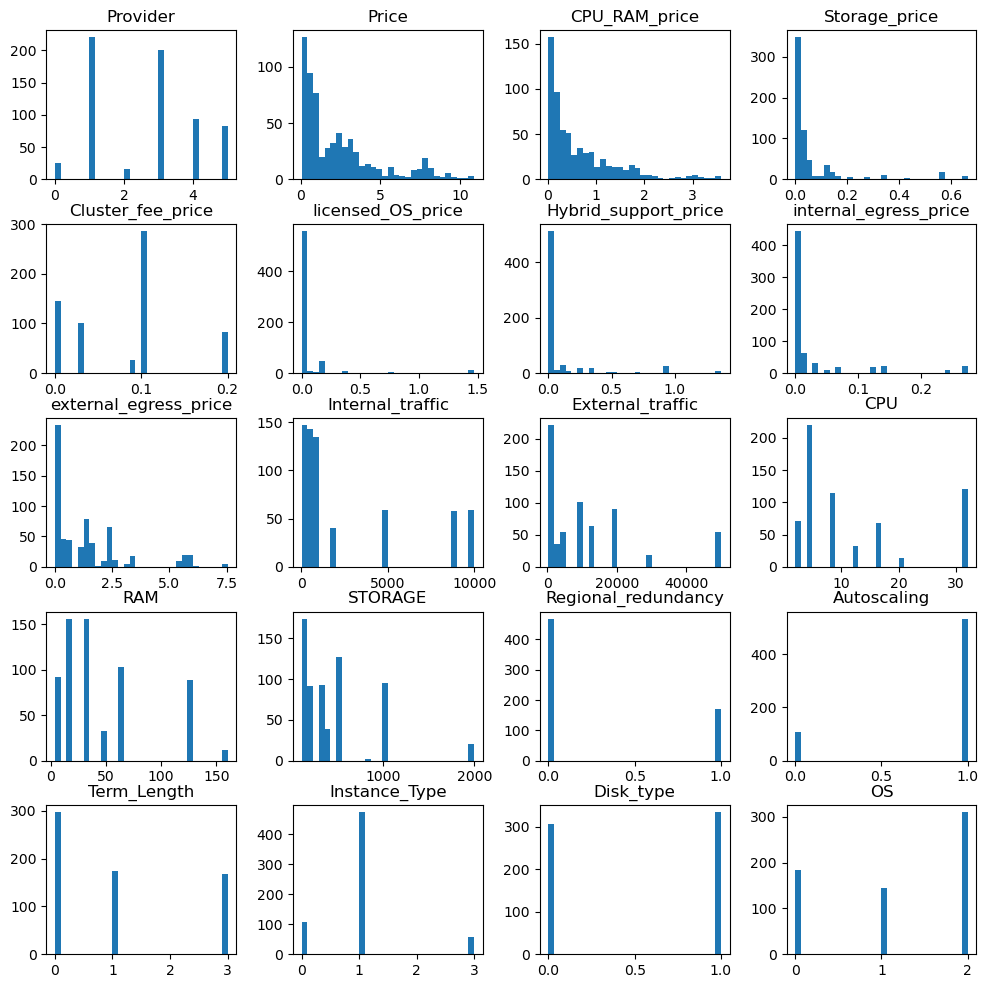

In [251]:
df.hist(bins = 30, figsize = (12,12), grid = False)

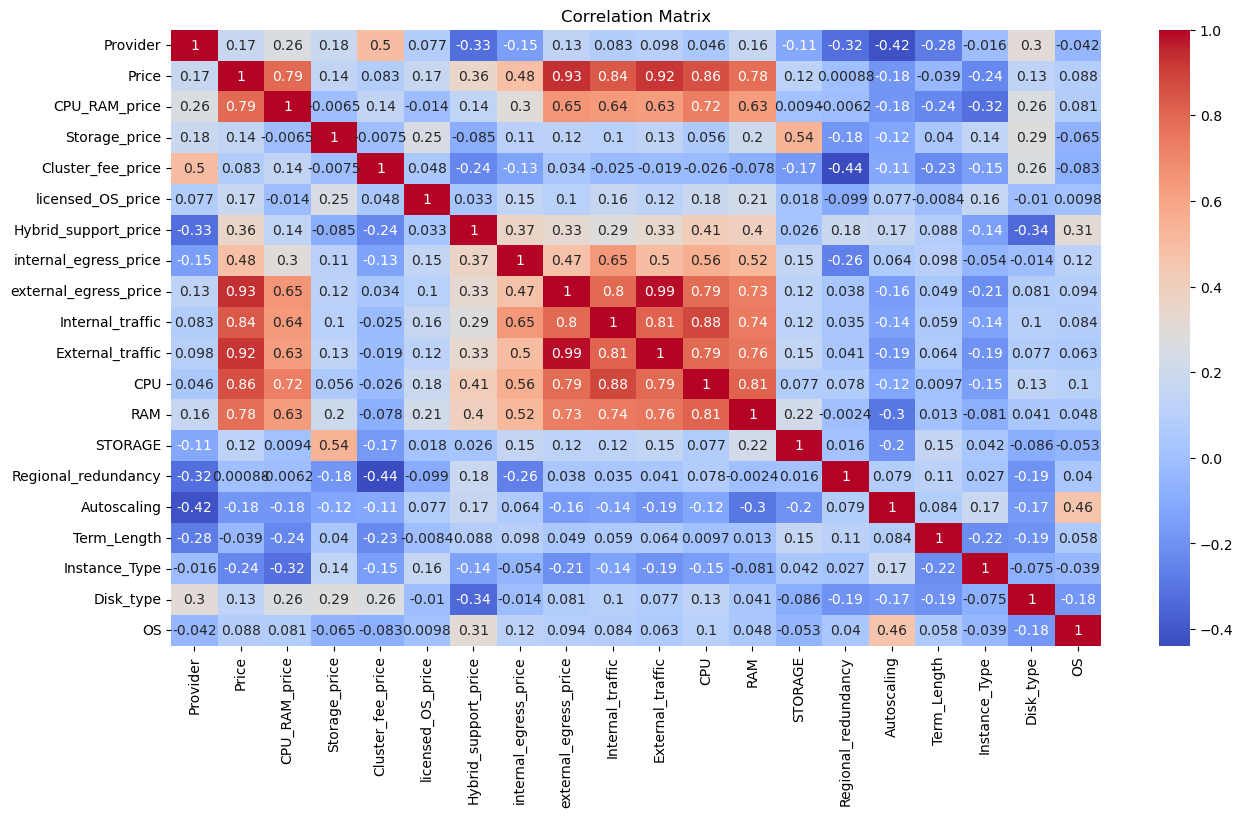

In [252]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
# Calculate correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Model Training

### Feature Selection

In [258]:
selected_features = ['CPU','Term_Length','Provider','STORAGE','OS','Disk_type','Price']
data_selected = df[selected_features]

# Data Splitting:


In [259]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = data_selected.drop(columns=['Price'])  # Features
y = data_selected['Price']  # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model selection

In [260]:
# Importing Libraries
from sklearn.linear_model import LinearRegression,Lasso ,Ridge ,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize regression models
linearR_model = LinearRegression()
lasso_model = Lasso(alpha=0.05)
ridge_model = Ridge(alpha=5)
elasticNet_model = ElasticNet(alpha=0.5)
decision_model = DecisionTreeRegressor(max_depth=20)
random_forest_model = RandomForestRegressor()
svr_model = SVR()
knn_model = KNeighborsRegressor()


# Model Training:


In [261]:
linearR_model.fit(x_train, y_train)

lasso_model.fit(x_train, y_train)

ridge_model.fit(x_train, y_train)

elasticNet_model.fit(x_train, y_train)

decision_model.fit(x_train, y_train)

random_forest_model.fit(x_train, y_train)

svr_model.fit(x_train, y_train)

knn_model.fit(x_train, y_train)

KNeighborsRegressor()

# Model Evaluation

In [262]:
score_lr=linear_model.score(x_train,y_train)*100 ,linear_model.score(x_test,y_test)*100

score_lasso=lasso_model.score(x_train,y_train)*100 ,lasso_model.score(x_test,y_test)*100

score_rid=ridge_model.score(x_train,y_train)*100 ,ridge_model.score(x_test,y_test)*100

score_en=elasticNet_model.score(x_train,y_train)*100 ,elasticNet_model.score(x_test,y_test)*100

score_dt=decision_model.score(x_train,y_train)*100 ,decision_model.score(x_test,y_test)*100

score_rf=random_forest_model.score(x_train,y_train)*100 ,random_forest_model.score(x_test,y_test)*100

score_svr=svr_model.score(x_train,y_train)*100 ,svr_model.score(x_test,y_test)*100

score_knn=knn_model.score(x_train,y_train)*100 ,knn_model.score(x_test,y_test)*100



print("Score Linear Regression:",score_lr )
print("Score Lasso:            ", score_lasso)
print("Score Ridge:            ", score_rid)
print("Score ElasticNet:       ", score_en)
print("Score Decision Tree:    ", score_dt)
print("Score Random Forest:    ", score_rf)
print("Score SVR:              ", score_svr)
print("Score KNN:              ", score_knn)

Score Linear Regression: (75.49925914656471, 79.63041979984725)
Score Lasso:             (75.30816929149277, 79.760191825884)
Score Ridge:             (75.49891437337145, 79.64775005921798)
Score ElasticNet:        (74.73092233938463, 78.53946830587732)
Score Decision Tree:     (96.231706407645, 91.40139238151266)
Score Random Forest:     (95.56913856240561, 94.81301616826423)
Score SVR:               (12.463544388764959, 9.848718382073784)
Score KNN:               (88.7723298678599, 91.47395050318666)


# RMSE

In [263]:
from sklearn.metrics import mean_squared_error

# Predictions on the testing set
y_pred_linear = linear_model.predict(x_test)
y_pred_lasso=lasso_model.predict(x_test)
y_pred_ridge=ridge_model.predict(x_test)
y_pred_elastic=elasticNet_model.predict(x_test)
y_pred_decision=decision_model.predict(x_test)
y_pred_rf = random_forest_model.predict(x_test)
y_pred_svr = svr_model.predict(x_test)
y_pred_knn = knn_model.predict(x_test)


# Calculate RMSE for each model
rmse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_lasso = mean_squared_error(y_test,y_pred_lasso)
rmse_ridge = mean_squared_error(y_test,y_pred_ridge )
rmse_elastic = mean_squared_error(y_test,y_pred_elastic )
rmse_decision = mean_squared_error(y_test,y_pred_decision )
rmse_rf =  mean_squared_error(y_test,y_pred_rf)
rmse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_knn = mean_squared_error(y_test, y_pred_knn)


print("RMSE Linear Regression:", rmse_linear)
print("RMSE Lasso            :", rmse_lasso)
print("RMSE Ridge            :",rmse_ridge )
print("RMSE ElasticNet       :",rmse_elastic )
print("RMSE Decision Tree    :",rmse_decision )
print("RMSE Random Forest    :", rmse_rf)
print("RMSE SVR              :", rmse_svr)
print("RMSE KNN              :", rmse_knn)



RMSE Linear Regression: 1.420510599296869
RMSE Lasso            : 1.4114607054519266
RMSE Ridge            : 1.4193020413942121
RMSE ElasticNet       : 1.4965901328599318
RMSE Decision Tree    : 0.5996399111437988
RMSE Random Forest    : 0.3617239746210823
RMSE SVR              : 6.286867467082156
RMSE KNN              : 0.5945799354403124


# Hyperparameter Tuning:


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_estimators': [30,50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)

# Perform GridSearchCV
grid_search.fit(x_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Cross-Validation Scores

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on random forest model
cv_scores = cross_val_score(random_forest_model, x, y, cv=5, scoring='neg_root_mean_squared_error')

# Display cross-validation scores
print("Cross-Validation Scores:", -cv_scores)  # Negative RMSE scores
print("Mean RMSE:", -cv_scores.mean())


# Model Training with Best Hyperparameters:

In [ ]:
best_random_forest_model = RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=50)
best_random_forest_model.fit(x_train, y_train)

# Model evaluation

In [ ]:
y_pred_test = best_random_forest_model.predict(x_test)

# Calculate RMSE on testing set
#rmse_test=mean_squared_error(y_test,rf.predict(x_test))
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE on Testing Set:", rmse_test)

# R^2 Square

In [ ]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = random_forest_model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

# Prediction Model

In [ ]:
input_data=(4,0,0,200,0,0)

input_data_as_numpy_array=np.asarray(input_data)

#reshape the array
input_data_reshaped =input_data_as_numpy_array.reshape(1,-1)

prediction=best_random_forest_model.predict(input_data_reshaped)

print("Prediction: ",prediction)
print("Cloud Service Provider Costs: ",prediction[0])